This notebook aims to understand `rl_learner/utils/plotting.py`.

# Running dummy experiments

In [1]:
import sys
sys.path.append('../')  # For importing `rl_learners`

import os
import gym
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rl_learner.utils.logger import EpochLogger

In [2]:
output_dir = './results/plotting'
env_name = 'CartPole-v1'
agent_name = 'random'
n_episodes = 100
run_ids = [0, 1, 2, 3]

env = gym.make(env_name)

for run_id in run_ids:
    logger = EpochLogger(output_dir=output_dir, env_name=env_name, agent_name=agent_name, run_id=run_id)
    for e in range(n_episodes):
        s, done, epi_r = env.reset(), False, 0
        while not done:
            a = env.action_space.sample()
            s_prime, r, done, info = env.step(a)
            epi_r += r
            
        logger.log(
            Epoch=e,
            AverageEpRet=epi_r
        )
    logger.dump()

Epoch: 0      | AverageEpRet: 11.0   | 
Epoch: 1      | AverageEpRet: 12.0   | 
Epoch: 2      | AverageEpRet: 10.0   | 
Epoch: 3      | AverageEpRet: 21.0   | 
Epoch: 4      | AverageEpRet: 11.0   | 
Epoch: 5      | AverageEpRet: 18.0   | 
Epoch: 6      | AverageEpRet: 11.0   | 
Epoch: 7      | AverageEpRet: 21.0   | 
Epoch: 8      | AverageEpRet: 43.0   | 
Epoch: 9      | AverageEpRet: 29.0   | 
Epoch: 10     | AverageEpRet: 11.0   | 
Epoch: 11     | AverageEpRet: 13.0   | 
Epoch: 12     | AverageEpRet: 16.0   | 
Epoch: 13     | AverageEpRet: 24.0   | 
Epoch: 14     | AverageEpRet: 20.0   | 
Epoch: 15     | AverageEpRet: 17.0   | 
Epoch: 16     | AverageEpRet: 14.0   | 
Epoch: 17     | AverageEpRet: 11.0   | 
Epoch: 18     | AverageEpRet: 40.0   | 
Epoch: 19     | AverageEpRet: 18.0   | 
Epoch: 20     | AverageEpRet: 33.0   | 
Epoch: 21     | AverageEpRet: 15.0   | 
Epoch: 22     | AverageEpRet: 15.0   | 
Epoch: 23     | AverageEpRet: 21.0   | 
Epoch: 24     | AverageEpRet: 18.0   | 


# Collecting experiments

In [3]:
def get_datasets(logdir):
    """
    Recursively look through logdir for output files produced by EpochLogger. 

    Assumes that any file "progress.txt" is a valid hit.

    Refereces:
        https://github.com/openai/spinningup/blob/master/spinup/utils/plot.py#L61
    """
    datasets = []
    for root, _, files in os.walk(logdir):
        if 'progress.txt' in files:
            exp_dir, run_id = os.path.split(root)
            exp_dir, agent_name = os.path.split(exp_dir)
            _, env_name = os.path.split(exp_dir)
            exp_data = pd.read_table(os.path.join(root, 'progress.txt'))

            # Add columns indicating experiments
            exp_data.insert(len(exp_data.columns), 'Env', env_name)
            exp_data.insert(len(exp_data.columns), 'Agent', agent_name)
            exp_data.insert(len(exp_data.columns), 'ID', run_id)

            datasets.append(exp_data)

    return datasets

In [4]:
datasets = get_datasets(logdir='./results/plotting')
datasets

[    Epoch  AverageEpRet          Env   Agent ID
 0       0          37.0  CartPole-v1  random  3
 1       1          12.0  CartPole-v1  random  3
 2       2          30.0  CartPole-v1  random  3
 3       3          13.0  CartPole-v1  random  3
 4       4          14.0  CartPole-v1  random  3
 ..    ...           ...          ...     ... ..
 95     95          13.0  CartPole-v1  random  3
 96     96          59.0  CartPole-v1  random  3
 97     97          14.0  CartPole-v1  random  3
 98     98          14.0  CartPole-v1  random  3
 99     99          18.0  CartPole-v1  random  3
 
 [100 rows x 5 columns],
     Epoch  AverageEpRet          Env   Agent ID
 0       0          11.0  CartPole-v1  random  0
 1       1          12.0  CartPole-v1  random  0
 2       2          10.0  CartPole-v1  random  0
 3       3          21.0  CartPole-v1  random  0
 4       4          11.0  CartPole-v1  random  0
 ..    ...           ...          ...     ... ..
 95     95          47.0  CartPole-v1  ran

# Plotting

In [5]:
def plot_data(data, x='Steps', target="AvgEpRet", smooth=1, hue='Agent', **kwargs):
    if smooth > 1:
        y = np.ones(smooth)
        for datum in data:
            x = np.asarray(datum[target])
            z = np.ones(len(x))
            smoothed_x = np.convolve(x, y, 'same') / np.convolve(z, y, 'same')
            datum[target] = smoothed_x

    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)

    # Plotting    
    sns.set(style='darkgrid', font_scale=1.5)
    sns.lineplot(data=data, x=x, y=target, hue=hue, **kwargs)
    plt.legend(loc='best').set_draggable(True)

    xscale = np.max(np.asarray(data[x])) > 5e3
    if xscale:
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 1))
    plt.tight_layout(pad=0.5)

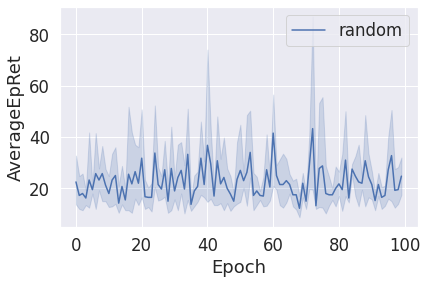

In [6]:
plt.figure()
plot_data(datasets, x='Epoch', target="AverageEpRet", smooth=1, hue='Agent')
plt.show()